In [1]:
import numpy  as np
import matplotlib.pyplot as plt
import cv2
import statsmodels.api as sm

/Users/Torgeir/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
num_train_images = 100
num_test_images = 10

In [3]:
np.random.seed(0)

In [4]:
# parameters
n = (100,100) # size of grid
R = 40    # degree of continuity
 
## code
xx,yy = np.meshgrid(np.arange(0,n[0],1)-n[0]//2,np.arange(0,n[1],1)-n[1]//2)
C = np.exp(-3*np.sqrt(xx*xx+yy*yy)/R)
fftC = np.fft.fft2(C)

dataset = np.empty((0,100,100))
for i in range(num_train_images):
    fftN = np.fft.fft2(np.random.normal(size=n))
    sample = np.real(np.fft.ifft2(np.sqrt(np.abs(fftC))*fftN))
    dataset = np.concatenate((dataset, np.expand_dims(sample, axis=0)), axis=0)
 
dataset = (dataset-np.min(dataset))/(np.max(dataset)-np.min(dataset))
 
# plotting
#plt.imshow(sample)
#plt.colorbar()


In [5]:
test_dataset = np.empty((0,100,100))
for i in range(num_test_images):
    fftN = np.fft.fft2(np.random.normal(size=n))
    sample = np.real(np.fft.ifft2(np.sqrt(np.abs(fftC))*fftN))
    test_dataset = np.concatenate((test_dataset, np.expand_dims(sample, axis=0)), axis=0)
test_dataset = (test_dataset-np.min(test_dataset))/(np.max(test_dataset)-np.min(test_dataset))

In [5]:
#plt.imshow(dataset[1])
#plt.colorbar()

In [6]:
"""
ggg = np.ones((10,10))
m=3
n=3
neighborhood = ggg[7-m:7,4-n:(4+n+1)]
flat_n = neighborhood.flatten()
dlt = n
                
nbh_ij = flat_n[:-(dlt)]
nbh_ij.shape
"""

'\nggg = np.ones((10,10))\nm=3\nn=3\nneighborhood = ggg[7-m:7,4-n:(4+n+1)]\nflat_n = neighborhood.flatten()\ndlt = n\n                \nnbh_ij = flat_n[:-(dlt)]\nnbh_ij.shape\n'

In [7]:
#neighborhood = ggg[7-m:7,5-n:(5+n+1)]
#flat_n = neighborhood.flatten()
#            
#dlt = n
            
#nbh_ij = flat_n[:-(dlt+1)]
#nbh_ij.shape

In [6]:
def create_nbh(ims, nbh_size):
    m, n = nbh_size    
    train_dat = []
    for im in ims:
        for i in range(m, im.shape[1]):
                for j in range(n, im.shape[1]-n):
                    
                    neighborhood = im[i+1-m:i+1,j-n:(j+n+1)]
                    flat_n = neighborhood.flatten()
                    
                    dlt = n
                    
                    nbh_ij = flat_n[:-(dlt)]
                    train_dat.append(nbh_ij)
    train_dat = np.array(train_dat)
    #print(train_dat.shape)
    return np.array(np.concatenate((np.ones((train_dat.shape[0],1)),train_dat),axis=1))



In [7]:
neighborhood_data = create_nbh(ims=dataset,nbh_size=(5,5))
np.array(neighborhood_data).shape

(855000, 51)

In [8]:
def lin_reg(train_dat):
    model = sm.OLS(train_dat[:,-1], train_dat[:,:-1])
    results = model.fit()
    betas = results.params
    
    y_pred = train_dat[:,1:-1]@betas[1:] + betas[0] 
    y_true = train_dat[:,-1]
    sigma2_hat = np.mean((y_true - y_pred)**2)

    return betas, sigma2_hat



In [9]:
parameters_estimate = lin_reg(neighborhood_data)

In [69]:
parameters_estimate[0][0]

0.004833387875878566

In [150]:
parameters_estimate[0]

array([ 9.00118774e-04,  1.39367926e-04,  1.85658609e-03, -1.71196738e-03,
       -2.85374507e-03, -9.19638311e-04, -1.83222206e-03, -1.05099702e-03,
       -1.27302639e-03,  6.13630793e-04, -1.10313160e-04, -1.36684013e-03,
       -2.84897474e-03, -9.33713197e-04, -1.17973237e-04, -2.16417395e-03,
       -1.78331351e-03, -1.79400089e-03, -3.24257648e-03, -2.75168727e-03,
       -1.77938448e-03, -6.83661930e-04,  5.14814549e-04,  1.48934762e-03,
       -7.45532158e-04, -9.28883171e-03, -2.25575029e-02, -4.49140684e-02,
       -4.34471782e-02, -2.66663493e-02, -1.52209011e-02, -9.85707419e-03,
       -2.61368337e-03, -3.39277804e-03, -6.30500407e-03, -1.11971556e-02,
       -3.51494728e-02,  2.68529733e-02,  3.51370489e-01,  2.12558161e-01,
        7.41913327e-02,  3.26015222e-02,  2.09291582e-02,  1.83653372e-02,
        1.12438513e-02,  8.33625284e-03,  1.10248172e-02,  4.03001690e-03,
        4.83213395e-01])

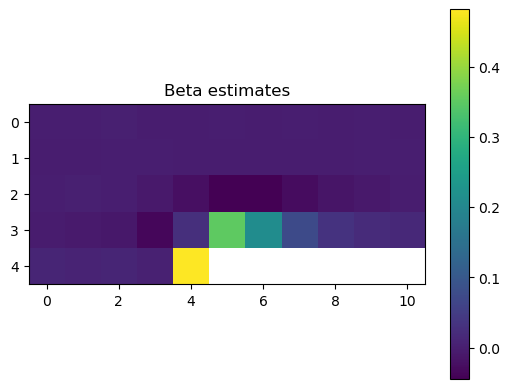

In [10]:
plt.imshow(np.concatenate((parameters_estimate[0][1:],np.array([np.inf,np.nan,np.nan,np.nan,np.nan,np.nan]))).reshape((5,11)))#,vmin=0)
plt.colorbar()
plt.title("Beta estimates")
plt.savefig('../figures/GRF_beta_est.jpg')

In [20]:
np.sqrt(0.0010763107149353594)

0.03280717474784074

In [65]:
def seq_sim(new_im, params, nbh_size):
    betas, sigma2 = params
    #new_im = np.zeros(im_shape)
    #new_im = dataset[4]
    new_im_sample = new_im.copy()
    pred_im = new_im.copy()
    m, n = nbh_size
    for i in range(5, new_im.shape[0]):
        for j in range(n, new_im.shape[1]-n):
            #neighborhood = new_im[i-m:i,j-n:j+n+1]
            neighborhood = new_im_sample[(i+1-m):i+1,(j-n):(j+n+1)]
            flat_n = neighborhood.flatten()

            dlt = n

            #nbh_ij = flat_n[:-(dlt+1)]
            nbh_ij = flat_n[:-(dlt)]
            #mu_pred = np.dot(betas[:],nbh_ij)
            mu_pred = nbh_ij[:-1]@betas[1:]+betas[0]

            sample = np.random.normal(mu_pred, np.sqrt(sigma2))
            pred = mu_pred

            #new_im_sample[i,j] = sample
            pred_im[i,j] = pred

    return pred_im #new_im_sample

In [57]:
seq_sim_sample = seq_sim(test_dataset[2],parameters_estimate, (5,5))

In [60]:
seq_sim_sample2 = seq_sim(test_dataset[8],parameters_estimate, (5,5))

In [61]:
seq_sim_sample3 = seq_sim(np.random.random((100,100)),parameters_estimate, (5,5))

In [66]:
seq_sim_pred = seq_sim(test_dataset[7],parameters_estimate, (5,5))

In [219]:
seq_sim_sample.shape

(100, 100)

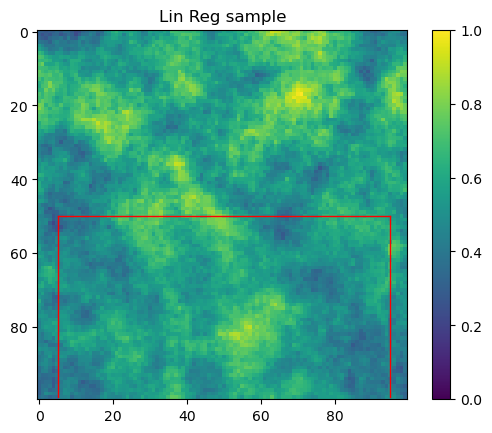

In [58]:
plt.imshow(seq_sim_sample, vmin=0,vmax=1)
x = [5, 95]
y = [50, 50]
xx = [5, 5]
yy = [50, 99]
xxx = [95, 95]
yyy = [50, 99]
plt.plot(x, y, color="red", linewidth=1)
plt.plot(xx, yy, color="red", linewidth=1)
plt.plot(xxx, yyy, color="red", linewidth=1)
plt.colorbar()
plt.title('Lin Reg sample')
plt.savefig('../figures/GRF_sample_im1.jpg')
plt.show()

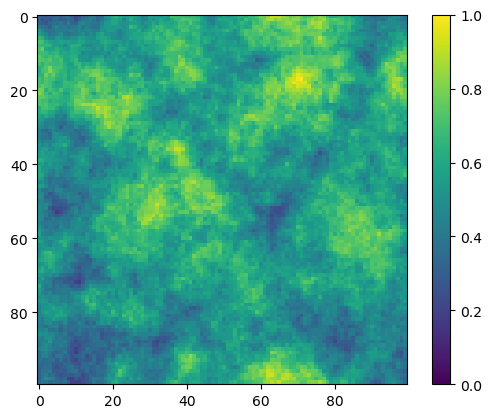

In [54]:
plt.imshow(test_dataset[2],vmin=0,vmax=1)
plt.colorbar()

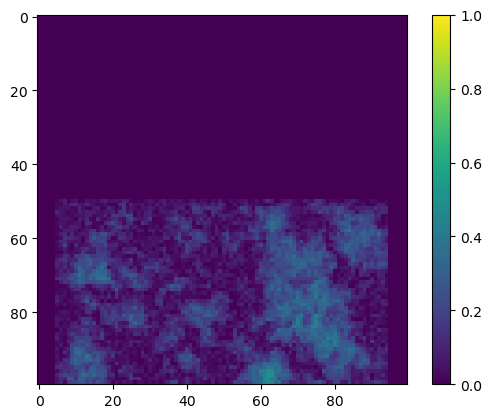

In [16]:
plt.imshow(np.abs(test_dataset[2]-seq_sim_sample),vmin=0,vmax=1)
plt.colorbar()

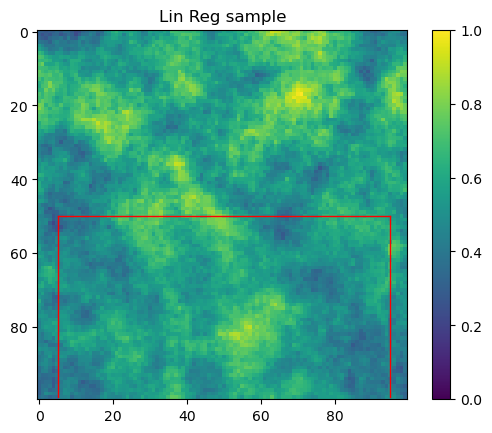

In [62]:
plt.imshow(seq_sim_sample, vmin=0,vmax=1)
x = [5, 95]
y = [50, 50]
xx = [5, 5]
yy = [50, 99]
xxx = [95, 95]
yyy = [50, 99]
plt.plot(x, y, color="red", linewidth=1)
plt.plot(xx, yy, color="red", linewidth=1)
plt.plot(xxx, yyy, color="red", linewidth=1)
plt.colorbar()
plt.title('Lin Reg sample')
plt.savefig('../figures/GRF_sample_im1.jpg')
plt.show()

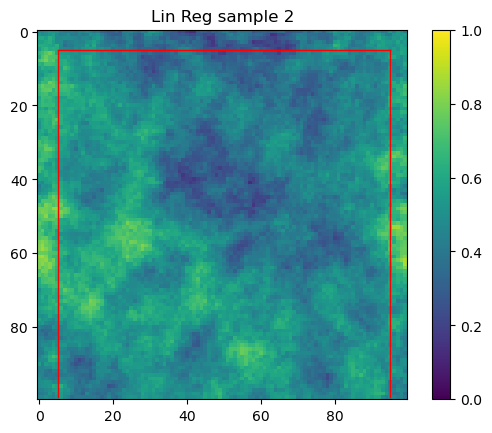

In [63]:
plt.imshow(seq_sim_sample2, vmin=0,vmax=1)
x = [5, 95]
y = [5, 5]
xx = [5, 5]
yy = [5, 99]
xxx = [95, 95]
yyy = [5, 99]
plt.plot(x, y, color="red", linewidth=1)
plt.plot(xx, yy, color="red", linewidth=1)
plt.plot(xxx, yyy, color="red", linewidth=1)
plt.colorbar()
plt.title('Lin Reg sample 2')
plt.savefig('../figures/GRF_sample_im2.jpg')
plt.show()

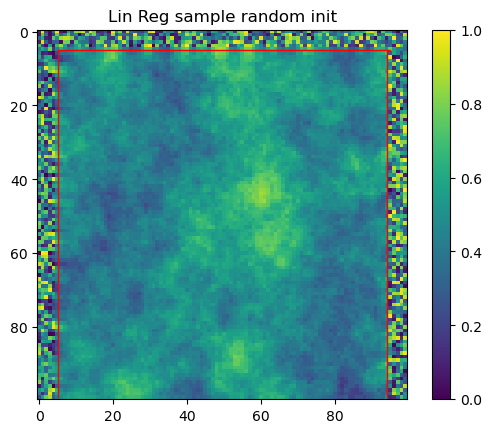

In [64]:
plt.imshow(seq_sim_sample3, vmin=0,vmax=1)
x = [5, 95]
y = [5, 5]
xx = [5, 5]
yy = [5, 99]
xxx = [94, 94]
yyy = [5, 99]
plt.plot(x, y, color="red", linewidth=1)
plt.plot(xx, yy, color="red", linewidth=1)
plt.plot(xxx, yyy, color="red", linewidth=1)
plt.colorbar()
plt.title('Lin Reg sample random init')
plt.savefig('../figures/GRF_sample_im3.jpg')
plt.show()

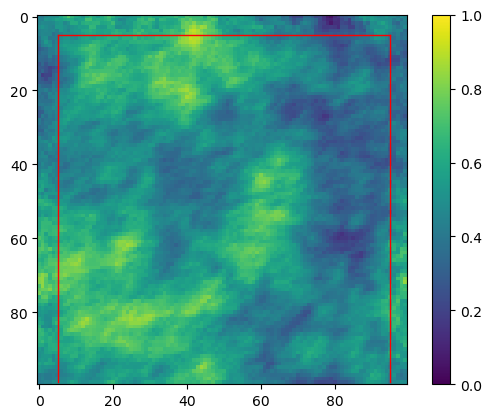

In [27]:
plt.imshow(seq_sim_pred, vmin=0,vmax=1)
x = [5, 95]
y = [5, 5]
xx = [5, 5]
yy = [5, 99]
xxx = [95, 95]
yyy = [5, 99]
plt.plot(x, y, color="red", linewidth=1)
plt.plot(xx, yy, color="red", linewidth=1)
plt.plot(xxx, yyy, color="red", linewidth=1)
plt.colorbar()
plt.savefig('../figures/GRF_pred_im1.jpg')
plt.show()

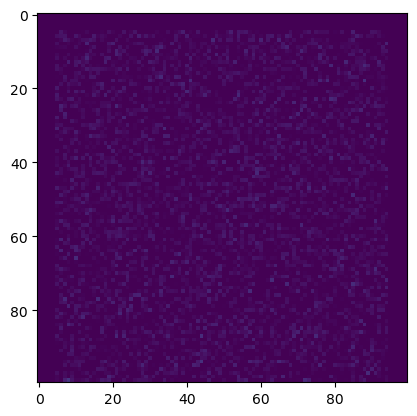

In [28]:
plt.imshow(test_dataset[7]-seq_sim_pred, vmin=0,vmax=1)

In [67]:
from scipy.stats import norm

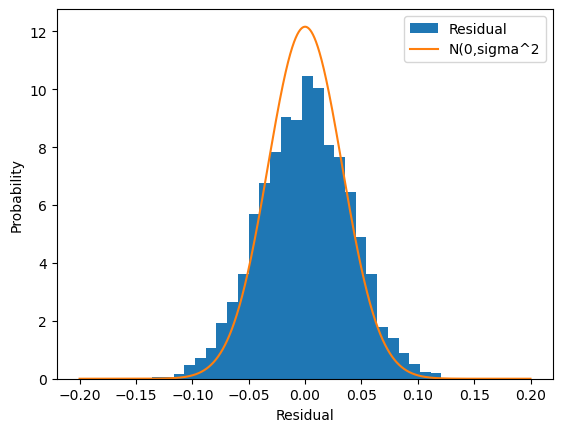

In [42]:
x = np.arange(-0.2, 0.2, 0.0001)
plt.hist((test_dataset[7][5:,5:95]-seq_sim_pred[5:,5:95]).flatten(), bins=30, density=True,label="Residual")
plt.plot(x, norm.pdf(x, 0, np.sqrt(parameters_estimate[1])), label= 'N(0,sigma^2)')
plt.xlabel('Residual')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [52]:
parameters_estimate[1]


0.0010760057626592698

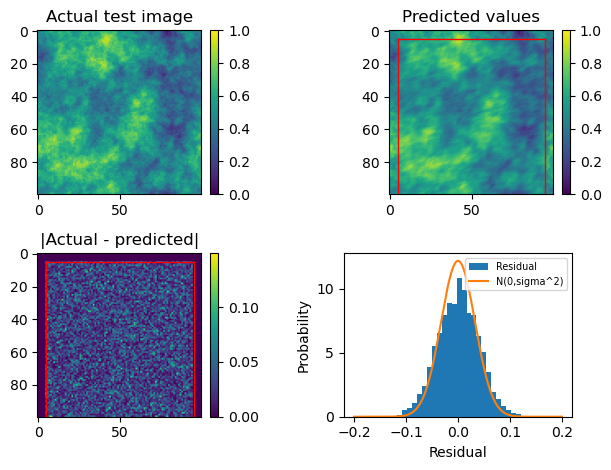

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=2)#,sharex=True, sharey=True)

im = axes.flat[0].imshow(test_dataset[7], vmin=0, vmax=1)
plt.colorbar(im, ax=axes[0,0],fraction=0.046, pad=0.04)
axes[0,0].set_title("Actual test image")

x = [5, 95]
y = [5, 5]
xx = [5, 5]
yy = [5, 99]
xxx = [95, 95]
yyy = [5, 99]
axes[0,1].plot(x, y, color="red", linewidth=1)
axes[0,1].plot(xx, yy, color="red", linewidth=1)
axes[0,1].plot(xxx, yyy, color="red", linewidth=1)
im = axes.flat[1].imshow(seq_sim_pred, vmin=0, vmax=1)
plt.colorbar(im, ax=axes[0,1],fraction=0.046, pad=0.04)
axes[0,1].set_title("Predicted values")


axes[1,0].plot(x, y, color="red", linewidth=1)
axes[1,0].plot(xx, yy, color="red", linewidth=1)
axes[1,0].plot(xxx, yyy, color="red", linewidth=1)
im = axes.flat[2].imshow(np.abs(test_dataset[7]-seq_sim_pred))#, vmin=0, vmax=1)
plt.colorbar(im, ax=axes[1,0],fraction=0.046, pad=0.04)
axes[1,0].set_title("|Actual - predicted|")
#axes.cax.colorbar(im)
#axes.cax.toggle_label(True)
#fig.colorbar(im)
#fig.tight_layout()
x = np.arange(-0.2, 0.2, 0.0001)
axes[1,1].hist((test_dataset[7][5:,5:95]-seq_sim_pred[5:,5:95]).flatten(), bins=30, density=True,label="Residual")
axes[1,1].plot(x, norm.pdf(x, 0, np.sqrt(parameters_estimate[1])), label= 'N(0,sigma^2)')
axes[1,1].set_xlabel('Residual')
axes[1,1].set_ylabel('Probability')
axes[1,1].legend(loc='upper right',fontsize='x-small')
#fig.set_figheight(5)
#fig.set_figwidth(14)
fig.tight_layout()
plt.savefig('../figures/GRF_pred_and_actual.jpg')
plt.show()

In [62]:
#plot train im

#for i in range(1, 5):
#    plt.subplot(2, 2, i)
#    plt.imshow(dataset[i])
#plt.colorbar()
#plt.show()

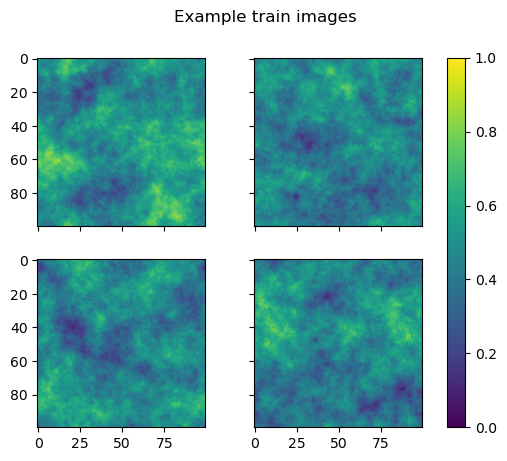

In [213]:
#plot train im

fig, axes = plt.subplots(nrows=2, ncols=2,sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    #print(i,ax)
    im = ax.imshow(dataset[i+1], vmin=0, vmax=1)

image = fig.colorbar(im, ax=axes.ravel().tolist())
fig.suptitle('Example train images')
plt.savefig('../figures/GRF_train_im.jpg')#, image)
plt.show()

In [71]:
image